In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
from PIL import Image

In [ ]:
# On Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_df = pd.read_csv("drive/MyDrive/train_hackathon/train.csv")
test_df= pd.read_csv("drive/MyDrive/test_hackathon/test.csv")

# **Images have different sizes. We have three options: 1. pad smaller images 2. crop bigger images 3. resize bigger images**

Biggest image size = 1500x1125
Smallest images size = 800x600
(Width, Height)

In [ ]:
biggest_size = (1500, 1125) # (Width, Height)
smallest_size = (800, 600)

1. Padding

In [ ]:
def pad_image(image_path, target_size):
    img = Image.open(image_path)
    pad_width = target_size[0] - img.width
    pad_height = target_size[1] - img.height
    img_padded = Image.new('RGB', target_size, (0, 0, 0))
    img_padded.paste(img, (pad_width // 2, pad_height // 2))
    return img_padded

In [ ]:
# Let us see how padding works
img_to_pad_path = "drive/MyDrive/train_hackathon/images/3.jpg"
target_size = biggest_size

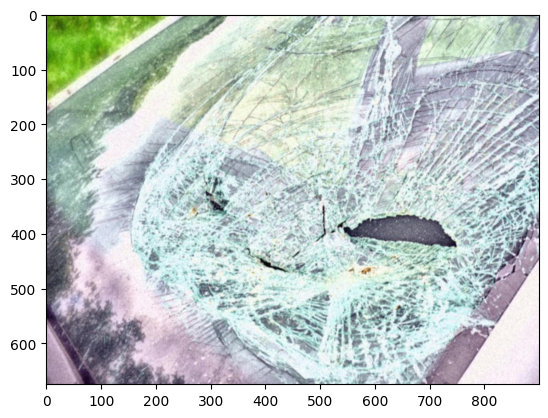

In [ ]:
img = plt.imread(img_to_pad_path)
plt.imshow(img)

In [ ]:
img.shape

(675, 900, 3)

In [ ]:
img_Image = Image.open(img_to_pad_path)

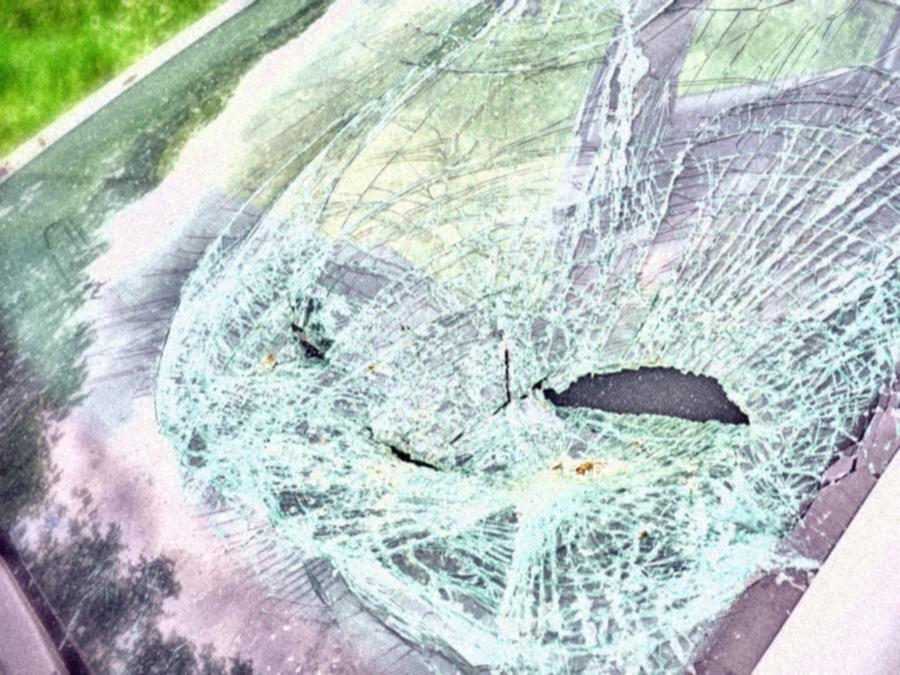

In [ ]:
img_Image

In [ ]:
img_Image.width, img_Image.height

(900, 675)

In [ ]:
img_padded = Image.new('RGB', target_size, (0, 0, 0))

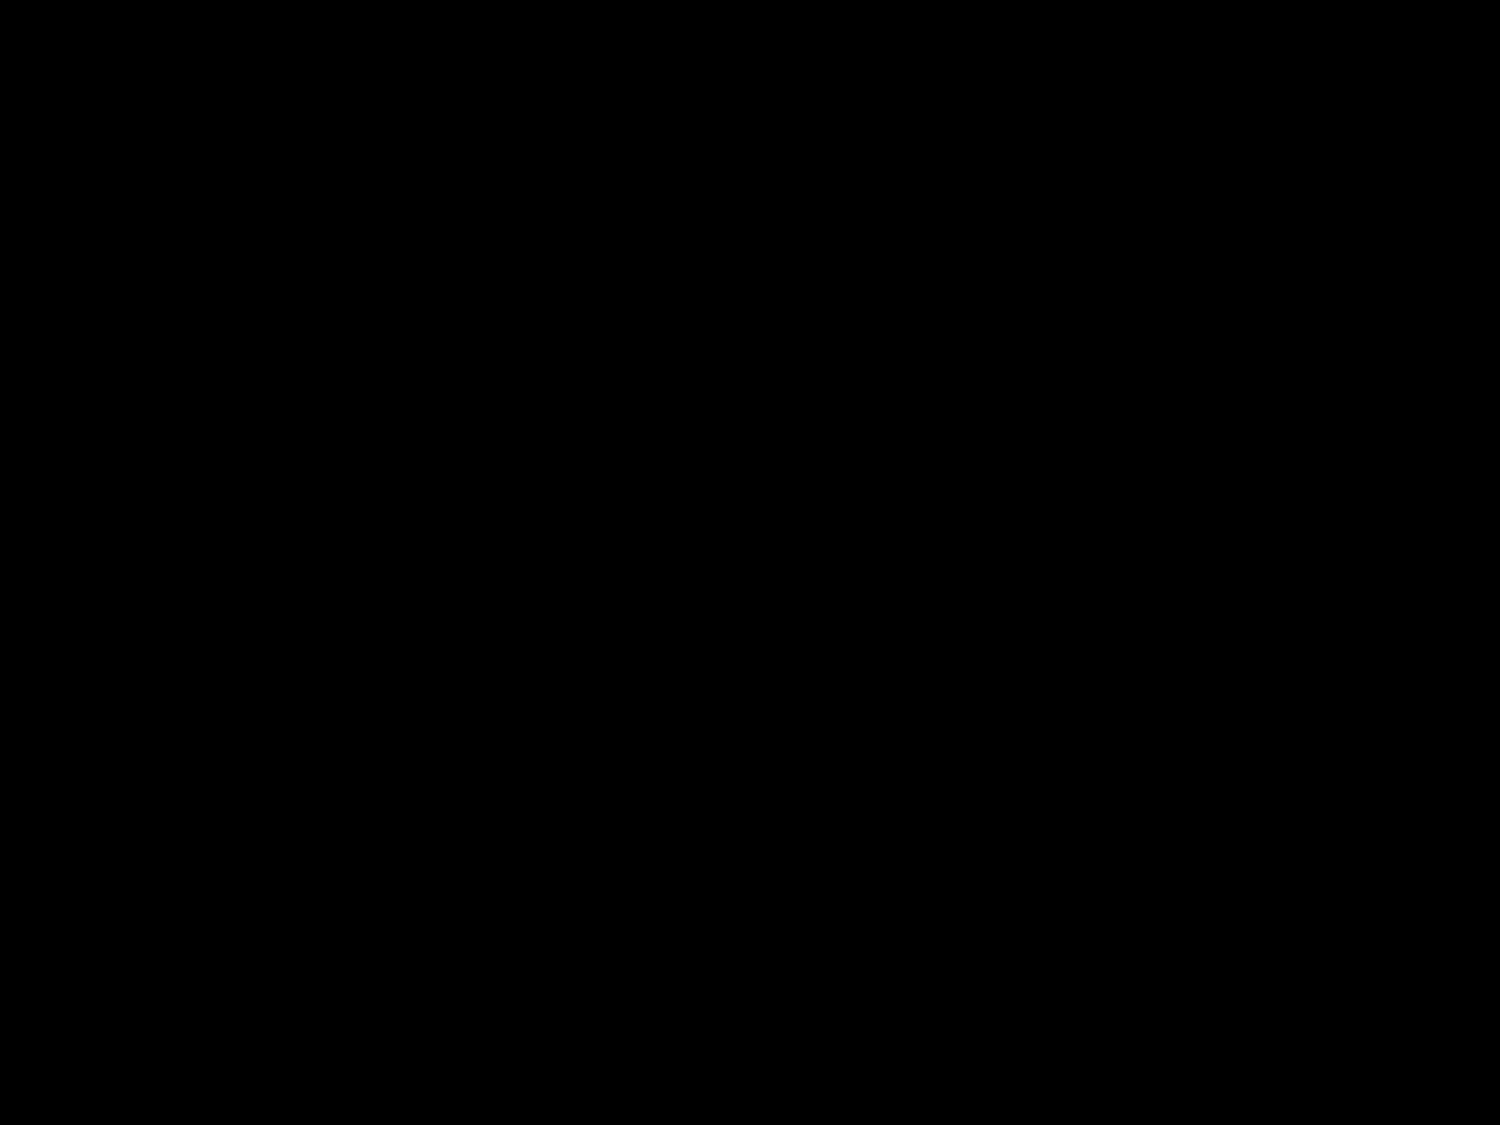

In [ ]:
img_padded

In [ ]:
pad_width = target_size[0] - img_Image.width
pad_height = target_size[1] - img_Image.height

In [ ]:
pad_width,pad_height

(600, 450)

In [ ]:
(pad_width // 2, pad_height // 2)

(300, 225)

In [ ]:
img_padded.paste(img_Image, (pad_width // 2, pad_height // 2))

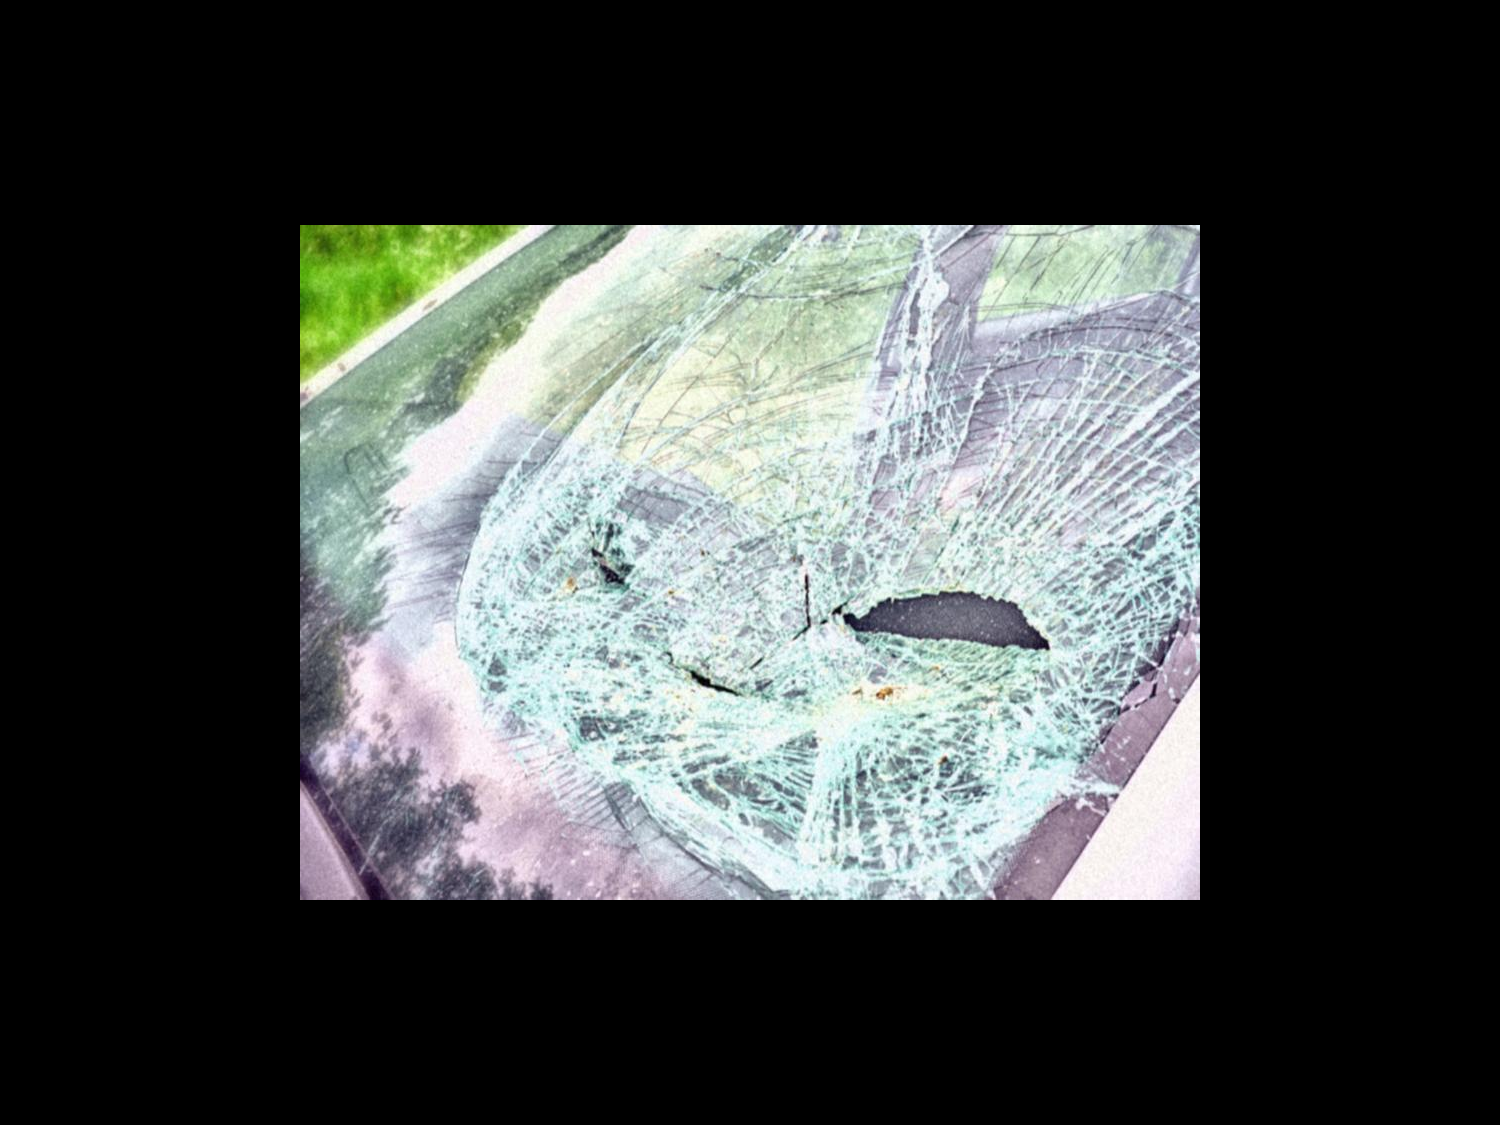

In [ ]:
img_padded

2. Cropping:

In [ ]:
def crop_image(image_path, target_size):
    img = Image.open(image_path)
    left = (img.width - target_size[0]) // 2
    top = (img.height - target_size[1]) // 2
    right = (img.width + target_size[0]) // 2
    bottom = (img.height + target_size[1]) // 2
    img_cropped = img.crop((left, top, right, bottom))
    return img_cropped

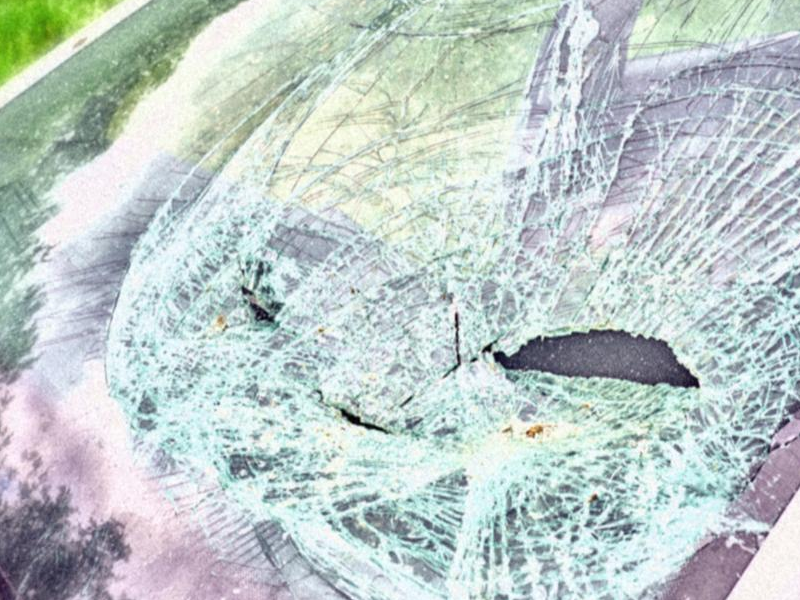

In [ ]:
crop_image(img_to_pad_path, smallest_size)

3. Resizing

In [ ]:
def resize_image(image_path, target_size):
    img = Image.open(image_path)
    img_resized = img.resize(target_size)
    return img_resized

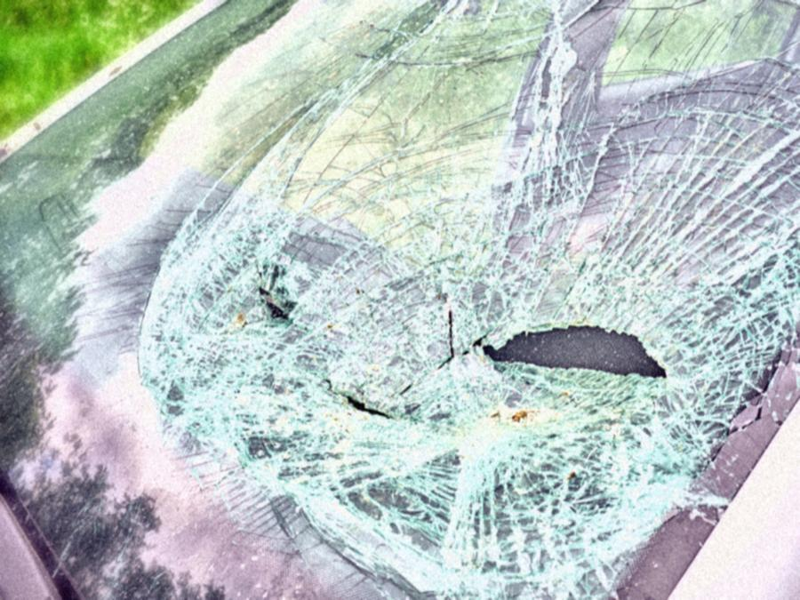

In [ ]:
resize_image(img_to_pad_path, smallest_size)

# **Resizing the training images**

In [ ]:
resized_train_images_path = "drive/MyDrive/train_hackathon/resized_images/"
if not os.path.exists(resized_train_images_path):
    os.makedirs(resized_train_images_path)

In [ ]:
train_imgs_folder_path = "drive/MyDrive/train_hackathon/images/"
for img_name in training_df["filename"]:
  original_image_path = train_imgs_folder_path + img_name
  resized_image = Image.open(original_image_path).resize(smallest_size)
  resized_image_path = resized_train_images_path + img_name
  resized_image.save(resized_image_path)